<a href="https://colab.research.google.com/github/baharsevinti/Machine-Learning-Diabet/blob/main/1_NaiveBayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Naive Bayes Results with Cross-Validation:
[[420  80]
 [111 157]]
              precision    recall  f1-score   support

           0       0.79      0.84      0.81       500
           1       0.66      0.59      0.62       268

    accuracy                           0.75       768
   macro avg       0.73      0.71      0.72       768
weighted avg       0.75      0.75      0.75       768



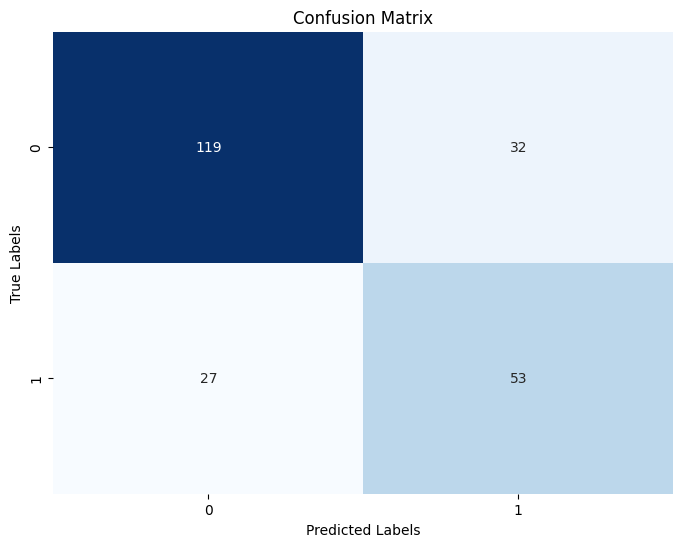


Performans Metrikleri
-----------------------------
Accuracy: 0.7445887445887446
Precision:  0.6235294117647059
Recall: 0.6625
F1 Score: 0.6424242424242423


In [ ]:
# Soru 1 ->  NAİVE BAYES

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score,f1_score
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.naive_bayes import GaussianNB
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri Setini Projete dahil etme
data = pd.read_csv("dataset.csv")

# Özellikler ve hedef değişkeni ayırıyoruz
X = data.drop(columns=['Class variable (0 or 1)'])  # Class variable sütununu dışarıda bırakarak veri setindeki bağımsız değişkenleri içeren bir DataFrame oluşturur

y = data['Class variable (0 or 1)']  # Class variable sütununu hedef değişken olarak seçer ve bunu y değişkenine atar.

# Verileri test ve eğitim olarak ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Naive Bayes modeli oluşturma
naive_bayes = GaussianNB()

# Modeli eğitme
naive_bayes.fit(X_train, y_train)

# Tahminleri cross-validation ile yapma
nb_predictions_cv = cross_val_predict(naive_bayes, X, y, cv=5)

print("Naive Bayes Results with Cross-Validation:")
print(confusion_matrix(y, nb_predictions_cv))
print(classification_report(y, nb_predictions_cv))

# Modelin test verileri üzerinde tahmin yapması
nb_predictions = naive_bayes.predict(X_test)

# Confusion matrix hesaplama işlemi
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

# Confusion matrix'i görselleştirme
plt.figure(figsize=(8, 6))
sns.heatmap(nb_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

from sklearn.metrics import accuracy_score, precision_score, recall_score

# Doğruluk (Accuracy) hesaplama
accuracy = accuracy_score(y_test, nb_predictions)

# Hassasiyet (Precision) hesaplama
precision = precision_score(y_test, nb_predictions)

# Duyarlılık (Recall) hesaplama
recall = recall_score(y_test, nb_predictions)

# F1 skoru hesaplama
f1 = f1_score(y_test, nb_predictions)

print("\nPerformans Metrikleri\n-----------------------------")
print("Accuracy:", accuracy)
print("Precision: ", precision)
print("Recall:", recall)
print("F1 Score:", f1)


